In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist_train = pd.read_csv('sample_data/mnist_train_small.csv', header=None)

(20000, 785)


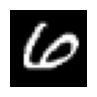

0


In [13]:
print( mnist_train.shape )

img = mnist_train.iloc[0, 1:].values.reshape(28, 28)
plt.figure(figsize=(1, 1))
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()
print(mnist_train.iloc[0, 1:].values[0])

In [19]:
# 데이터 준비
from sklearn.model_selection import train_test_split

X = mnist_train.iloc[:, 1:].values
y = mnist_train.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1962, 2243, 1989, 2021, 1924, 1761, 2039, 2126, 1912, 2023]))

In [20]:
# 모델 학습
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(1.0, 0.9528)

In [22]:
# 모델 학습 2-1
# from sklearn.neural_network import MLPClassifier
import tensorflow as tf
# import keras
from tensorflow import keras as tf_keras

# tf_keras.models.Sequential
model = tf_keras.Sequential([
    tf_keras.layers.Input(shape=(784,)),            # 입력층
    tf_keras.layers.Dense(512, activation="relu"),
    tf_keras.layers.Dense(256, activation="relu"),
    tf_keras.layers.Dense(10, activation="softmax") # 출력층
])

In [23]:
# 모델 학습 2-2

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 모델 학습 2-3

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=256, epochs=20, validation_split=0.2)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9382 - loss: 0.7487 - val_accuracy: 0.9127 - val_loss: 1.6097
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9571 - loss: 0.4660 - val_accuracy: 0.9310 - val_loss: 1.0503
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9754 - loss: 0.1980 - val_accuracy: 0.9367 - val_loss: 1.0082
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9825 - loss: 0.1608 - val_accuracy: 0.9450 - val_loss: 0.9083
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9887 - loss: 0.0878 - val_accuracy: 0.9407 - val_loss: 0.8211
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9892 - loss: 0.0765 - val_accuracy: 0.9470 - val_loss: 0.7591
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9897 - loss: 0.0673 - val_accuracy: 0.9400 - val_loss: 0.9368
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9840 - loss: 0.1256 - val_accuracy: 0.9367 - v

In [27]:
# 모델 검증(테스트)

model.evaluate(X_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9523 - loss: 0.8985


[0.803854763507843, 0.9549999833106995]

In [30]:
# 예측 실행

predicted_values = model.predict(X_test[:10])

predicted_values2 = predicted_values.argmax(axis=1)
print(predicted_values2)

( predicted_values2 == y_test[:10] ).sum()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[4 0 8 1 1 2 9 0 4 9]


10